### TIME SERIES FORECASTING - UNIVARIATE

In [1]:
# Load necessary Libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Predefine plotting styles
plt.style.use("fivethirtyeight")
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'
# It groups together all families and predefine all the settigs for plots

In [3]:
# Read the data files
df=pd.read_csv("airline.csv")
df.head()

,Month,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


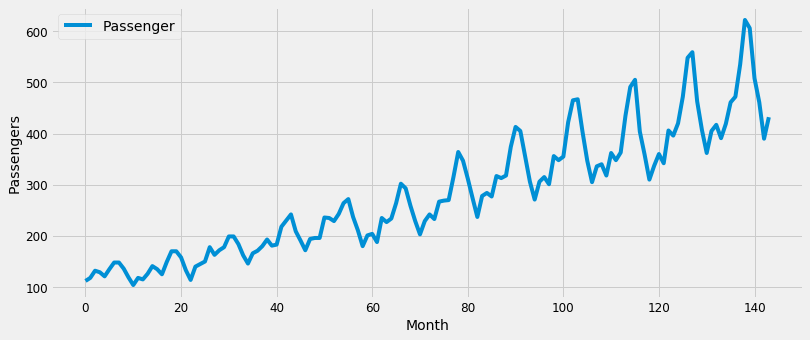

In [4]:
# Plot the time-series
df.plot(figsize=(12,5))
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()
# Inference: linearly increasing and seasonality in data too

In [5]:
# Month column is not readable in the required format, we convert
df['Month']=pd.to_datetime(df['Month'])
df['Month'].head()
# Data is now set up for plotting

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: Month, dtype: datetime64[ns]

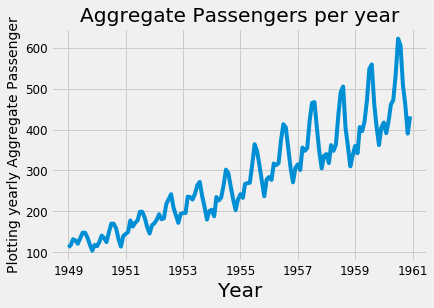

In [6]:
# Aggregating passengers per year
year_sum=df.groupby('Month').sum()
# Plotting
plt.plot(year_sum)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Plotting yearly Aggregate Passenger')
plt.title('Aggregate Passengers per year')
plt.show()

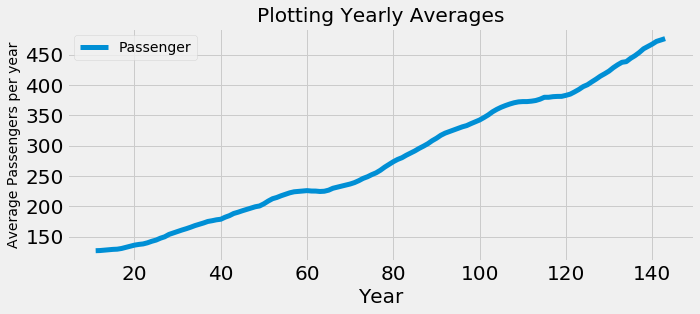

In [7]:
#Identifying trend in data
passenger=df[['Passenger']]
# So that not whole array is taken, but values from each record is taken
passenger.rolling(12).mean().plot(figsize=(10,4),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Average Passengers per year')
plt.title('Plotting Yearly Averages')
plt.legend()
# This is the trend estimated in the moving averages
# Since the average is increasing, there is trend

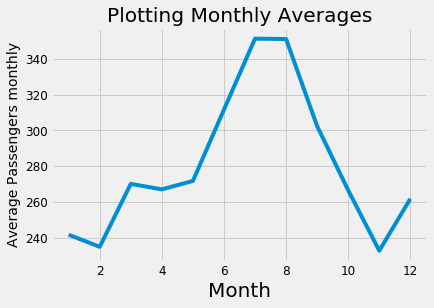

In [8]:
# Checking Monthly Trend
month_avg=df.groupby(df['Month'].dt.month).mean()
month_avg
# Plotting
plt.plot(month_avg)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Average Passengers monthly')
plt.title('Plotting Monthly Averages')
plt.show()

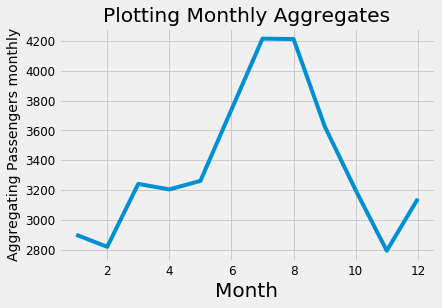

In [9]:
# Aggregating passengers per Month
month_sum=df.groupby(df['Month'].dt.month).sum()
month_sum
# Plotting
plt.plot(month_sum)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Aggregating Passengers monthly')
plt.title('Plotting Monthly Aggregates')
plt.show()

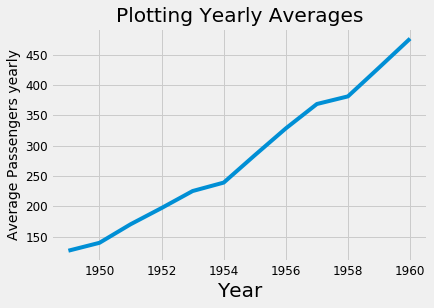

In [10]:
# Checking Yearly Trend
year_avg=df.groupby(df['Month'].dt.year).mean()
# Plotting
plt.plot(year_avg)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Average Passengers yearly')
plt.title('Plotting Yearly Averages')
plt.show()

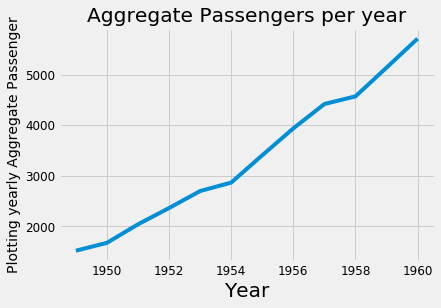

In [11]:
# Aggregating passengers per year
year_sum=df.groupby(df['Month'].dt.year).sum()
# Plotting
plt.plot(year_sum)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Plotting yearly Aggregate Passenger')
plt.title('Aggregate Passengers per year')
plt.show()

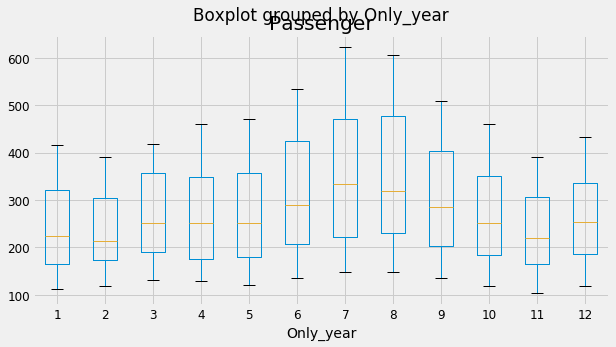

In [12]:
df['Only_year'] = df['Month'].dt.month
df.boxplot(column="Passenger",by='Only_year', figsize=(10,5))

In [13]:
# Creating training and test data
train=passenger[:120]
test=passenger[120:]
pred=passenger[120:]
pred['naive']=train['Passenger'][119]

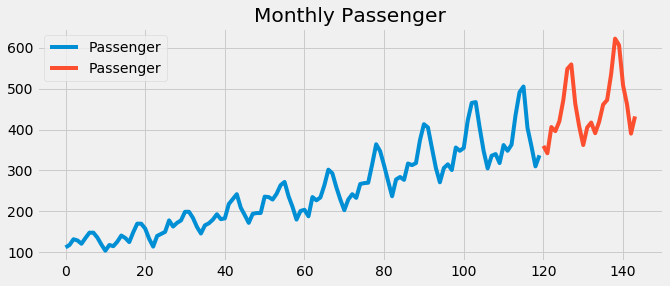

In [14]:
# Plotting train and test data
train.Passenger.plot(figsize=(10,4),title='Monthly Passenger', fontsize=14)
test.Passenger.plot(figsize=(10,4),title='Monthly Passenger', fontsize=14)
plt.legend(loc='best')
plt.show()

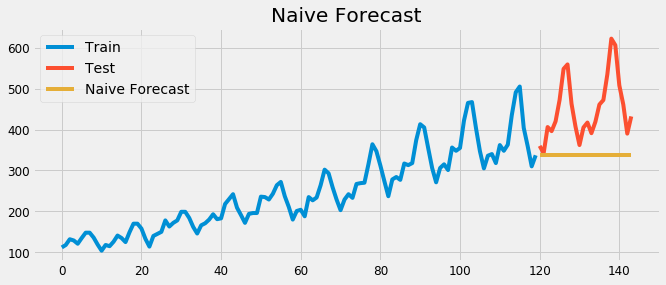

In [15]:
# NAIVE FORECASTING
plt.figure(figsize=(10,4))
plt.plot(train.index,train['Passenger'],label="Train")
plt.plot(test.index,test['Passenger'],label="Test")
plt.plot(pred.index,pred['naive'],label="Naive Forecast")
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

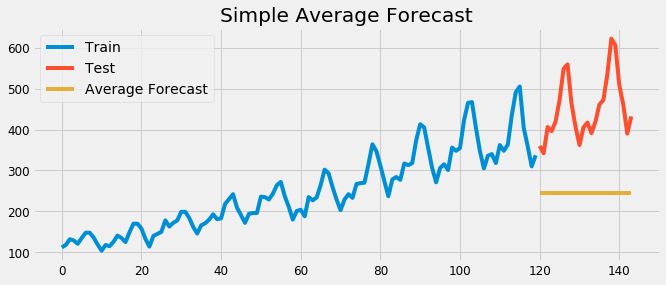

In [16]:
# SIMPLE AVERAGE FORECASTING
pred['avg'] = train['Passenger'].mean()
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Passenger'],label='Train')
plt.plot(test.index, test['Passenger'],label='Test')
plt.plot(pred.index, pred['avg'], label='Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Forecast')
plt.show()

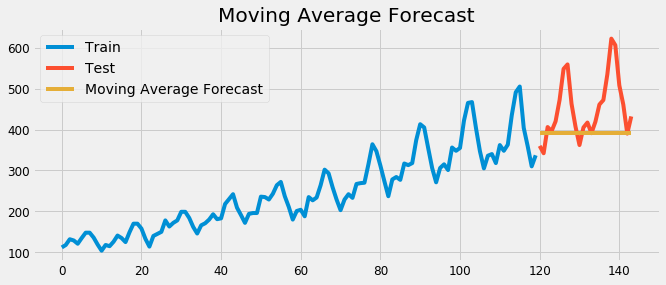

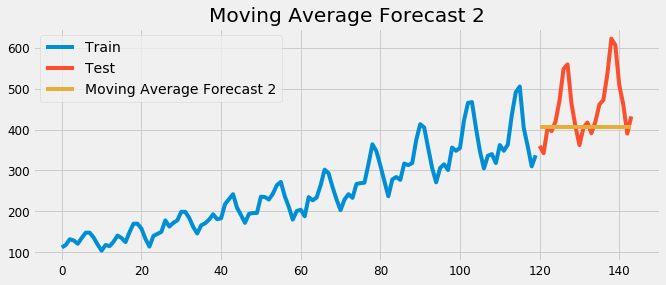

In [17]:
# MOVING AVERAGE FORECASTING
pred['mov_avg'] = train['Passenger'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Passenger'],label='Train')
plt.plot(test.index, test['Passenger'],label='Test')
plt.plot(pred.index, pred['mov_avg'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')
plt.show()

# MOVING AVERAGE FORECASTING 2
pred['mov_avg2'] = train['Passenger'].rolling(7).mean().iloc[-1]
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Passenger'],label='Train')
plt.plot(test.index, test['Passenger'],label='Test')
plt.plot(pred.index, pred['mov_avg2'], label='Moving Average Forecast 2')
plt.legend(loc='best')
plt.title('Moving Average Forecast 2')
plt.show()

In [19]:
# Computing the Root Mean square Error (RMSE)
print("\nERRORS:-")
rmse_naive = sqrt(mean_squared_error(test.Passenger,pred.naive))
print("RMSE using Naive Forecasting : ",rmse_naive)
rmse_avg = sqrt(mean_squared_error(test.Passenger,pred.avg))
print("RMSE using Simple Average Forecasting : ",rmse_avg)
rmse_mov_avg = sqrt(mean_squared_error(test.Passenger,pred.mov_avg))
print("RMSE using Moving Average Forecasting : ",rmse_mov_avg)
rmse_mov_avg2 = sqrt(mean_squared_error(test.Passenger,pred.mov_avg2))
print("RMSE using Moving Average Forecasting 2 : ",rmse_mov_avg2)


ERRORS:-
RMSE using Naive Forecasting :  137.32898455897794
RMSE using Simple Average Forecasting :  219.43921915368222
RMSE using Moving Average Forecasting :  96.32969427959378
RMSE using Moving Average Forecasting 2 :  87.91464436530215


### MODEL FITTING

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_pred_avg = test.copy()

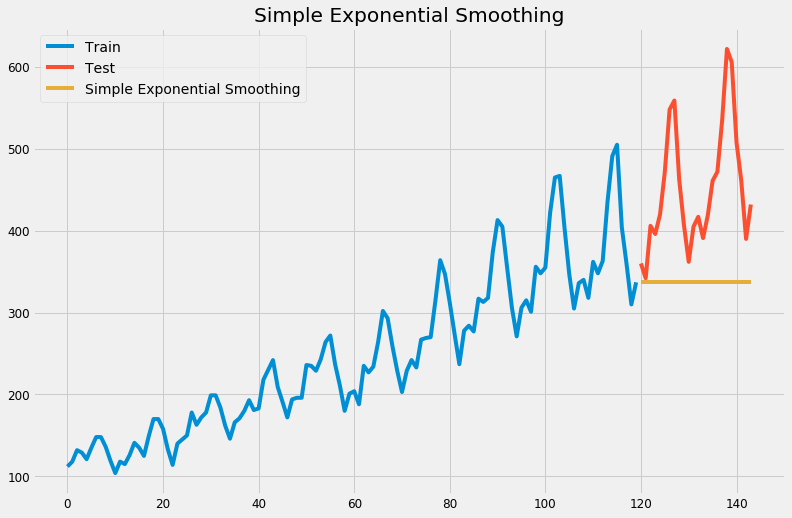

Alpha :  1.0
RMSE using Simple Exponential Smoothing :  137.32898455897794


In [25]:
# SIMPLE EXPONENTIAL SMOOTHING
m1 = SimpleExpSmoothing(np.asarray(train['Passenger'])).fit(smoothing_level=0.6, optimized=False)
fitted =  SimpleExpSmoothing(train['Passenger']).fit(optimized=True)
y_pred_avg['SES'] = fitted.forecast(len(test))
plt.figure(figsize=(12,8))
plt.plot(train['Passenger'],label='Train')
plt.plot(test['Passenger'],label='Test')
plt.plot(y_pred_avg['SES'], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()
# ALPHA
Alpha = print('Alpha : ',fitted.model.params['smoothing_level'])
Alpha = fitted.forecast(len(test)).rename(r'$\alpha=%s$'%fitted.model.params['smoothing_level'])
# ERROR
rmse_ses = sqrt(mean_squared_error(test.Passenger,y_pred_avg.SES))
print("RMSE using Simple Exponential Smoothing : ",rmse_ses)